In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('Diabetes Classification.csv')

In [ ]:
data.head()

,Id,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Id,0
Age,0
Gender,0
BMI,0
Chol,0
TG,0
HDL,0
LDL,0
Cr,0
BUN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         5132 non-null   int64  
 1   Age        5132 non-null   int64  
 2   Gender     5132 non-null   object 
 3   BMI        5132 non-null   int64  
 4   Chol       5132 non-null   float64
 5   TG         5132 non-null   float64
 6   HDL        5132 non-null   float64
 7   LDL        5132 non-null   float64
 8   Cr         5132 non-null   float64
 9   BUN        5132 non-null   float64
 10  Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


<Axes: >

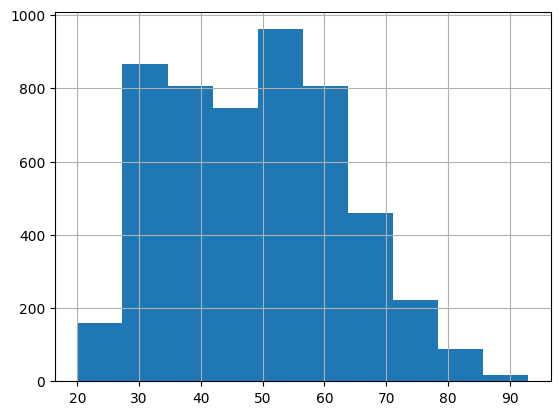

In [ ]:
data["Age"].hist()

<Axes: >

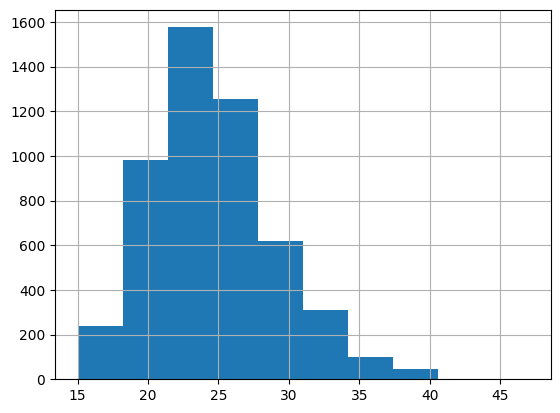

In [ ]:
data["BMI"].hist()

In [ ]:
men = data.loc[data.Gender == 'M']["Diagnosis"]
rate_men = sum(men)/len(men)

print("% of men who had diagnosed:", rate_men)

% of men who had diagnosed: 0.3792997542997543


In [ ]:
women = data.loc[data.Gender == 'F']["Diagnosis"]
rate_women = sum(women)/len(women)

print("% of men who had diagnosed:", rate_women)

% of men who had diagnosed: 0.40373333333333333


In [ ]:
sex = pd.get_dummies(data["Gender"], drop_first=True)

In [ ]:
sex.head()

,M,f
0,False,False
1,True,False
2,True,False
3,False,False
4,False,False


In [ ]:
data["Gender"].value_counts()

,count
Gender,
M,3256
F,1875
f,1


In [ ]:
data['Gender'] = [ 'Female' if i !='M' else 'Male' for i in data['Gender'] ]

In [ ]:
data.head()

,Id,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,Female,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,Male,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,Male,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,Female,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,Female,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [ ]:
data["Diagnosis"].value_counts()

,count
Diagnosis,
0,3139
1,1993


In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,3256
Female,1876


In [ ]:
sex = pd.get_dummies(data["Gender"], drop_first=True)

In [ ]:
sex.head()

,Male
0,False
1,True
2,True
3,False
4,False


In [ ]:
data = pd.concat([data, sex], axis=1)

In [ ]:
data = data.replace({True: 1, False: 0})

<ipython-input-22-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
data.drop(["Gender"], axis=1, inplace=True)

In [ ]:
data.head()

,Id,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Male
0,0,50,24,4.2,0.9,2.4,1.4,46.0,4.7,0,0
1,1,26,23,3.7,1.4,1.1,2.1,62.0,4.5,0,1
2,2,33,21,4.9,1.0,0.8,2.0,46.0,7.1,0,1
3,3,45,21,2.9,1.0,1.0,1.5,24.0,2.3,0,0
4,4,50,24,3.6,1.3,0.9,2.1,50.0,2.0,0,0


In [ ]:
data.drop(["Id"], axis=1, inplace=True)

In [ ]:
data.head()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Male
0,50,24,4.2,0.9,2.4,1.4,46.0,4.7,0,0
1,26,23,3.7,1.4,1.1,2.1,62.0,4.5,0,1
2,33,21,4.9,1.0,0.8,2.0,46.0,7.1,0,1
3,45,21,2.9,1.0,1.0,1.5,24.0,2.3,0,0
4,50,24,3.6,1.3,0.9,2.1,50.0,2.0,0,0


In [ ]:
data.shape

(5132, 10)

In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reset index after shuffling

In [ ]:
data.head()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Male
0,30,23,3.52,0.64,1.33,2.05,54.2,3.80,0,0
1,47,26,3.60,5.20,1.21,2.97,49.0,3.19,1,0
2,54,29,6.30,6.80,0.70,2.40,69.0,5.50,1,1
3,70,22,5.06,1.52,1.09,3.22,83.3,2.31,1,1
4,33,22,4.97,1.99,1.58,2.26,99.0,6.00,0,1


In [ ]:
X = data.drop('Diagnosis', axis=1) 
Y = data['Diagnosis']

In [ ]:
X.shape, Y.shape

((5132, 9), (5132,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
import joblib
import time
import os

class MetaLearnerPredictor:
    def __init__(self, model_dir='saved_model'):
        """
        Load the saved model, scaler, and mappings
        """
        self.model = tf.keras.models.load_model(os.path.join(model_dir, 'meta_learner_model.keras'))
        self.feature_scaler = joblib.load(os.path.join(model_dir, 'feature_scaler.pkl'))

        # Load the mappings
        mappings = joblib.load(os.path.join(model_dir, 'feature_mappings.pkl'))
        self.max_features_mapping = mappings['max_features_mapping']
        self.inverse_max_features_mapping = mappings['inverse_max_features_mapping']

    def predict_accuracy(self, dataset_features, hyperparams):
        """
        Predict accuracy for given dataset features and hyperparameters
        """
        # Scale dataset features
        dataset_scaled = self.feature_scaler.transform(dataset_features)

        # Convert max_features to numerical value
        if isinstance(hyperparams['max_features'], str):
            max_features_encoded = self.max_features_mapping.get(hyperparams['max_features'], 1)  
        else:
            max_features_encoded = hyperparams['max_features']

        # Combine features
        X = np.hstack([
            dataset_scaled,
            np.array([[
                hyperparams['n_estimators'],
                hyperparams['max_depth'],
                max_features_encoded,
                hyperparams['min_samples_split']
            ]])
        ])

        return self.model.predict(X)[0][0]

def find_best_hyperparameters(meta_learner, dataset_features, param_grid):
    """
    Find best hyperparameters using meta-learner
    """
    start_time = time.time()
    best_accuracy = 0
    best_params = None

    # Try all combinations from param_grid
    for n_est in param_grid['n_estimators']:
        for depth in param_grid['max_depth']:
            for feat in param_grid['max_features']:
                for min_split in param_grid['min_samples_split']:
                    params = {
                        'n_estimators': n_est,
                        'max_depth': depth,
                        'max_features': feat,
                        'min_samples_split': min_split
                    }

                    pred_accuracy = meta_learner.predict_accuracy(dataset_features, params)

                    if pred_accuracy > best_accuracy:
                        best_accuracy = pred_accuracy
                        best_params = params

    # Convert max_features back to string if it's in the mapping
    if isinstance(best_params['max_features'], (int, float)):
        if best_params['max_features'] in meta_learner.inverse_max_features_mapping:
            best_params['max_features'] = meta_learner.inverse_max_features_mapping[round(best_params['max_features'])]

    time_taken = time.time() - start_time

    return best_params, best_accuracy, time_taken

def compare_methods(dataset_features, param_grid, X_train, y_train):
    """
    Compare meta-learner with traditional methods
    Returns time taken and best parameters for each method
    """
    results = {}

    # 1. Grid Search
    start_time = time.time()
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    grid_time = time.time() - start_time

    results['grid_search'] = {
        'time': grid_time,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    # 2. Bayesian Optimization
    def bo_objective(n_estimators, max_depth, min_samples_split):
        clf = RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            max_features='sqrt',  # Fixed to 'sqrt' for simplicity
            min_samples_split=int(min_samples_split),
            random_state=42
        )
        clf.fit(X_train, y_train)
        return clf.score(X_train, y_train)

    start_time = time.time()
    pbounds = {
        'n_estimators': (param_grid['n_estimators'][0], param_grid['n_estimators'][-1]),
        'max_depth': (param_grid['max_depth'][0], param_grid['max_depth'][-1]),
        'min_samples_split': (param_grid['min_samples_split'][0], param_grid['min_samples_split'][-1])
    }

    bo = BayesianOptimization(
        f=bo_objective,
        pbounds=pbounds,
        random_state=42
    )

    bo.maximize(init_points=5, n_iter=10)
    bo_time = time.time() - start_time

    results['bayesian_opt'] = {
        'time': bo_time,
        'best_params': {
            'n_estimators': int(bo.max['params']['n_estimators']),
            'max_depth': int(bo.max['params']['max_depth']),
            'max_features': 'sqrt',
            'min_samples_split': int(bo.max['params']['min_samples_split'])
        },
        'best_score': bo.max['target']
    }

    # 3. Meta-Learner
    meta_learner = MetaLearnerPredictor()
    best_params, best_accuracy, meta_time = find_best_hyperparameters(
        meta_learner, dataset_features, param_grid
    )

    results['meta_learner'] = {
        'time': meta_time,
        'best_params': best_params,
        'best_score': best_accuracy
    }

    return results

In [ ]:

X = data.drop('Diagnosis', axis=1) 
Y = data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# User input for dataset characteristics
num_features = X_train.shape[1]  # Total number of features
num_samples = X_train.shape[0]   # Number of samples

# User inputs 
class_imbalance_ratio = 1.5750
num_classes = 2
num_categorical_features = 1
num_numerical_features = 8

# Create dataset features array
dataset_features = np.array([[
    num_features,
    num_samples,
    class_imbalance_ratio,
    num_classes,
    num_categorical_features,
    num_numerical_features
]])

# Define parameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [5, 7, 10, 15, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']        # Adjust weights to handle the slight imbalance
}

# Compare methods
results = compare_methods(dataset_features, param_grid, X_train, Y_train)

# Print results
for method, result in results.items():
    print(f"\n{method}:")
    print(f"Time taken: {result['time']:.2f} seconds")
    print("Best parameters:", result['best_params'])
    print(f"Best score: {result['best_score']:.4f}")

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.9725    | 21.85     | 9.606     | 159.8     |
| 2         | 0.9978    | 31.94     | 3.248     | 73.4      |
| 3         | 0.8655    | 7.614     | 8.929     | 140.2     |
| 4         | 0.9993    | 36.86     | 2.165     | 195.5     |
| 5         | 0.9981    | 42.46     | 3.699     | 77.27     |
| 6         | 0.972     | 49.69     | 9.713     | 174.4     |
| 7         | 0.999     | 36.59     | 3.24      | 194.3     |
| 8         | 0.8392    | 5.168     | 2.185     | 198.0     |
| 9         | 0.9927    | 47.94     | 4.919     | 50.19     |
| 10        | 0.8945    | 9.841     | 9.449     | 50.89     |
| 11        | 0.9993    | 29.56     | 2.079     | 97.56     |
| 12        | 0.9749    | 49.52     | 8.399     | 109.7     |
| 13        | 0.9713    | 49.59     | 9.882     | 199.3     |
| 14        | 0.8404    | 5.096     | 2.289     | 90.88     |
| 15    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def validate_rf_params(X_train, Y_train, params, name=""):
    """
    Train a Random Forest with given parameters and return the accuracy
    """
    # Create and train the model
    rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        random_state=42  # for reproducibility
    )

    # Fit and predict
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_train)

    # Calculate accuracy
    acc = accuracy_score(Y_train, y_pred)

    print(f"\n{name} Parameters:")
    print(f"Parameters used: {params}")
    print(f"Actual Training Accuracy: {acc:.4f}")

    return acc

# Parameters from the output
grid_search_params = {
    'n_estimators': 100,
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_split': 10
}

bayesian_opt_params = {
    'n_estimators': 195,
    'max_depth': 36,
    'max_features': 'sqrt',
    'min_samples_split': 2
}

meta_learner_params = {
    'n_estimators': 50,
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_split': 5
}

# Validate all three parameter combinations
grid_acc = validate_rf_params(X_train, Y_train, grid_search_params, "Grid Search")
bayesian_acc = validate_rf_params(X_train, Y_train, bayesian_opt_params, "Bayesian Optimization")
meta_acc = validate_rf_params(X_train, Y_train, meta_learner_params, "Meta-learner")


Grid Search Parameters:
Parameters used: {'n_estimators': 100, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10}
Actual Training Accuracy: 0.9695

Bayesian Optimization Parameters:
Parameters used: {'n_estimators': 195, 'max_depth': 36, 'max_features': 'sqrt', 'min_samples_split': 2}
Actual Training Accuracy: 0.9993

Meta-learner Parameters:
Parameters used: {'n_estimators': 50, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5}
Actual Training Accuracy: 0.9878
